In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.axes
from matplotlib.offsetbox import AnchoredText
import csv
import pylab as pl
import numpy as np
import config_constants as cc
from collections import OrderedDict

In [2]:
# Load data and add column names
folder = '.\Results\AutoXYTest_20230510_111619'
name = '\AutoXYTest_20230510_111619\FullList'
winlist = '\AutoXYTest_20230510_111619\WinList'
losslist = '\AutoXYTest_20230510_111619\LossList'
errorlist = '\AutoXYTest_20230510_111619\ErrorList'

headers = ['X (mm)', 'Y (mm)']
headers2 = ['Error (mm)']

data = pd.read_csv('.\Results\%s.csv' %name, names=headers) #select your file
wins = pd.read_csv('.\Results\%s.csv' %winlist, names=headers) #select your file
errs = pd.read_csv('.\Results\%s.csv' %errorlist, names=headers2) #select your file

try:
    losses = pd.read_csv('.\Results\%s.csv' %losslist, names=headers) #select your file
except:
    losses = []
    print("No losses :)")
finally:
    #start = pd.read_csv('.\Results\AutoXYTest_20230116_164712.csv', names=headers, skiprows=lambda x: (x != 0) and not x % 2)
    start = data.iloc[::2, :]
    #destination = pd.read_csv('.\Results\pre_20230113_145250.csv', nrows=1, names=headers) #select your file
    destination = data.iloc[1::2, :]
    destinationx = destination['X (mm)'].tolist()
    destx = []
    [destx.append(item) for item in destinationx if item not in destx]
    destinationy = destination['Y (mm)'].tolist()
    desty = []
    [desty.append(item) for item in destinationy if item not in desty]    #end = pd.read_csv('.\Results\AutoXYTest_20230116_164712.csv', names=headers, skiprows=lambda x: x % 2)
    end = data.iloc[2::2, :]
    moves = data.iloc[0::2, :]
    

In [3]:
print(moves)
print(destx,desty)

        X (mm)     Y (mm)
0    14.898220  10.970976
2    14.020417  11.158203
4    14.037594  11.176683
6    13.989206  11.199219
8    14.043250  11.151651
..         ...        ...
128  17.648080  11.309080
130  13.835571  11.723769
132  13.846061  11.869253
134  13.855460  12.003161
136  13.844310  12.040217

[69 rows x 2 columns]
[14.026090208831397, 14.714030437169944, 16.69216802878927, 15.98552050587391, 16.36438522033577, 16.88286679062631, 15.65288346043901, 12.88411243230802, 17.652611331119225, 13.853523552787689] [11.182077915645175, 12.23955108402145, 10.992573470658096, 12.538477317713838, 9.367211954771028, 9.27488533883567, 13.264709244955146, 10.68018799153264, 11.308540169536212, 12.041478723573748]


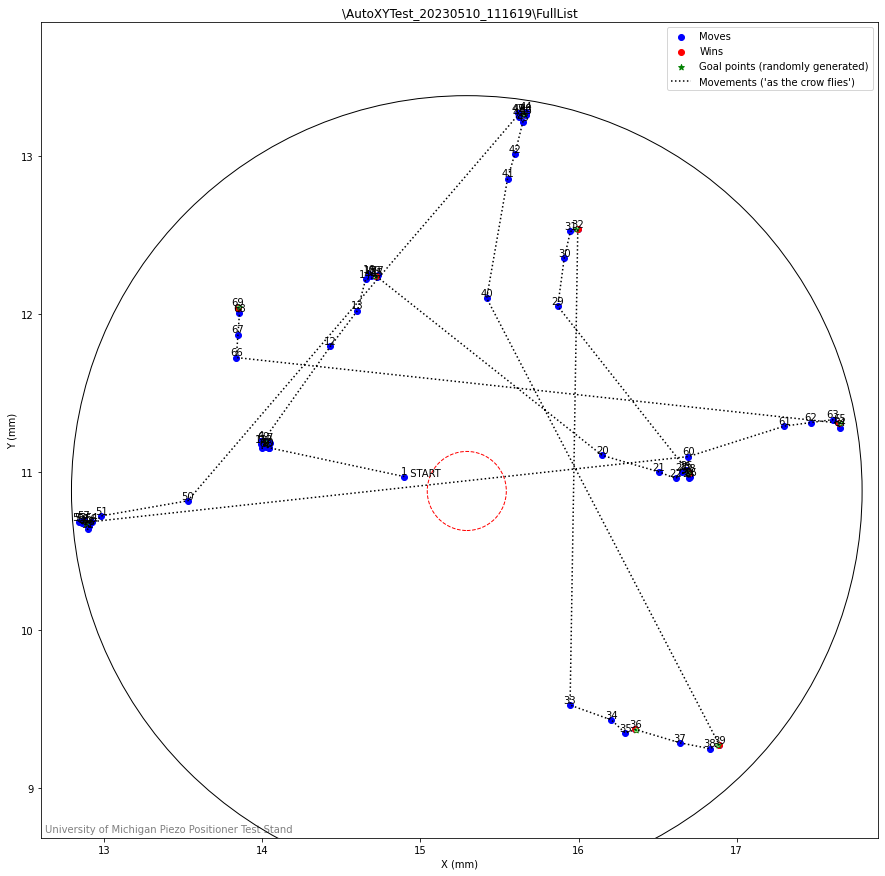

In [4]:
# Plot
steps = list(range(1,len(moves['X (mm)']) +1))
#print(steps)
figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(111)
plt.scatter(moves['X (mm)'], moves['Y (mm)'],color='blue',label="Moves")
plt.scatter(wins['X (mm)'], wins['Y (mm)'],c='red',label="Wins",marker = 'o')
plt.scatter(destx, desty,c='green',label="Goal points (randomly generated)",marker = '*')

#for (xi, yi, i) in zip(destination['X (mm)'], destination['Y (mm)'],steps):
    #plt.text(xi, yi, i, va='bottom', ha='center')
#plt.scatter(end['X (mm)'], end['Y (mm)'],color='blue',label="Ending points")
for (xi, yi, i) in zip(moves['X (mm)'], moves['Y (mm)'],steps):
    plt.text(xi, yi, i, va='bottom', ha='center')
    
circle_x = cc.circle['circle_x'] 
circle_y = cc.circle['circle_y']    
circle_r = cc.circle['circle_r']
circle1 = plt.Circle( (circle_x, circle_y ), circle_r , fill = False )
circle2 = plt.Circle( (circle_x, circle_y ), 0.25 , fill = False, color = 'r', linestyle = '--')
ax.add_artist( circle1 )
ax.add_artist( circle2 )

#print(list(range(1,len(destination['X (mm)']) +1)))

for i in range(len(destx)):
    circle = plt.Circle( (destx[i] , desty[i]), 0.01 , fill = False, color = 'lightgreen', linestyle = '-')
    ax.add_artist( circle )
    

plt.text(data['X (mm)'][0],data['Y (mm)'][0],'  START',size = 10)
#plt.text(end['X (mm)'][-1:],end['Y (mm)'][-1:],'  END',size = 10)
plt.plot(moves['X (mm)'],moves['Y (mm)'],color = 'black', linestyle = ':',label="Movements ('as the crow flies')" )

#endx = end['X (mm)'].tolist()
#endy = end['Y (mm)'].tolist()
#destx = destination['X (mm)'].tolist()
#desty = destination['Y (mm)'].tolist()

#xdiffs = np.subtract(destx, endx)
#xerror = list(xdiffs)

#ydiffs = np.subtract(desty, endy)
#yerror = list(ydiffs)


#plt.quiver(end['X (mm)'], end['Y (mm)'], xerror, yerror, scale_units ='xy', scale = 1, width=.002,color='orange',label="Error")

ab = AnchoredText("University of Michigan Piezo Positioner Test Stand", loc="lower left", frameon=False, borderpad=0, prop=dict(alpha=0.5), )
ab.set_zorder(0)
ax.add_artist(ab)

plt.title(name)
plt.axis('equal')
plt.xlim()
plt.ylim()
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend(loc='upper right')
plt.savefig(folder + '\FullPlot')
plt.show()

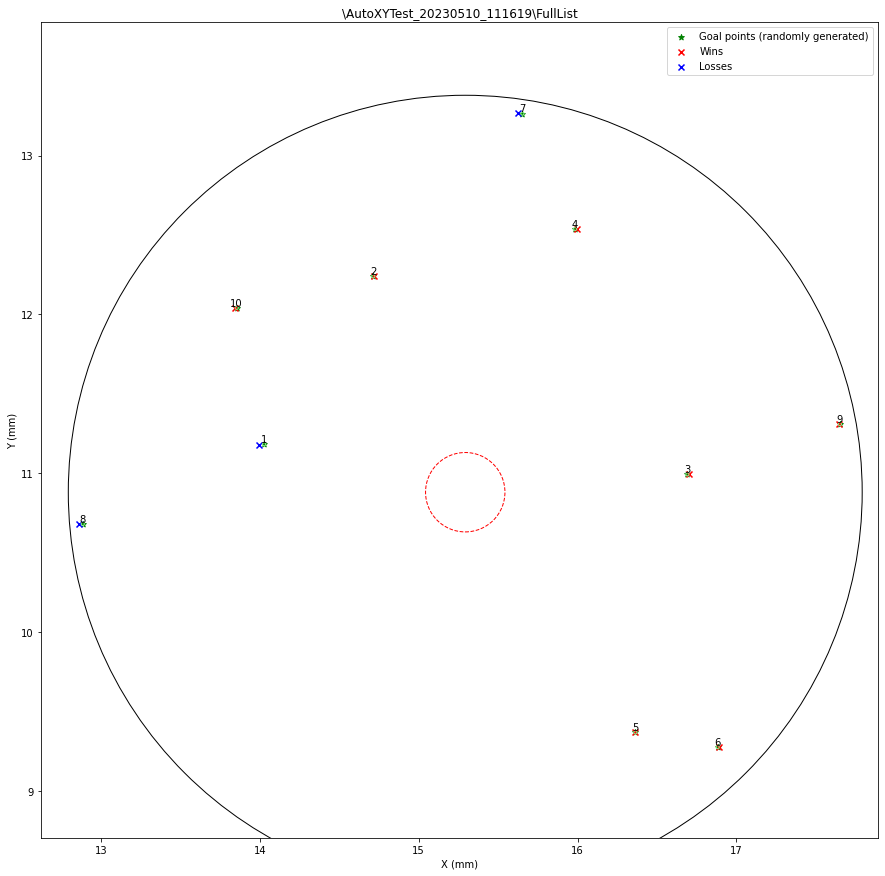

In [5]:
# Plot
steps = list(range(1,len(moves['X (mm)']) +1))
#print(steps)
figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(111)
#plt.scatter(moves['X (mm)'], moves['Y (mm)'],color='blue',label="Moves")
plt.scatter(destx, desty,c='green',label="Goal points (randomly generated)",marker = '*')
plt.scatter(wins['X (mm)'], wins['Y (mm)'],c='red',label="Wins",marker = 'x')

steps = list(range(1,len(destx) +1))

for (xi, yi, i) in zip(destx, desty,steps):
    plt.text(xi, yi, i, va='bottom', ha='center')
    
try:
    plt.scatter(losses['X (mm)'], losses['Y (mm)'],c='blue',label="Losses",marker = 'x')
except:
    print("No losses :)")
finally:
    circle_x = cc.circle['circle_x'] 
    circle_y = cc.circle['circle_y']    
    circle_r = cc.circle['circle_r']
    circle1 = plt.Circle( (circle_x, circle_y ), circle_r , fill = False )
    circle2 = plt.Circle( (circle_x, circle_y ), 0.25 , fill = False, color = 'r', linestyle = '--')
    ax.add_artist( circle1 )
    ax.add_artist( circle2 )


    for i in range(len(destx)):
        circle = plt.Circle( (destx[i] , desty[i]), 0.01 , fill = False, color = 'lightgreen', linestyle = '-')
        ax.add_artist( circle )


    plt.title(name)
    plt.axis('equal')
    plt.xlim()
    plt.ylim()
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.legend(loc='best')
    plt.savefig(folder + '\CoordsOnly')
    plt.show()

In [9]:
#print(errs)
print("The sucess rate here was:",len(wins),"/",len(destx),"or",100*float(len(wins)/len(destx)),"%.")
print("Including losses, the maximum positioning error was:", float(errs.max(0))*1000,"um and the average was",float(errs.mean(0))*1000,"um.")

The sucess rate here was: 7 / 10 or 70.0 %.
Including losses, the maximum positioning error was: 34.3439278955461 um and the average was 13.444965720214789 um.
